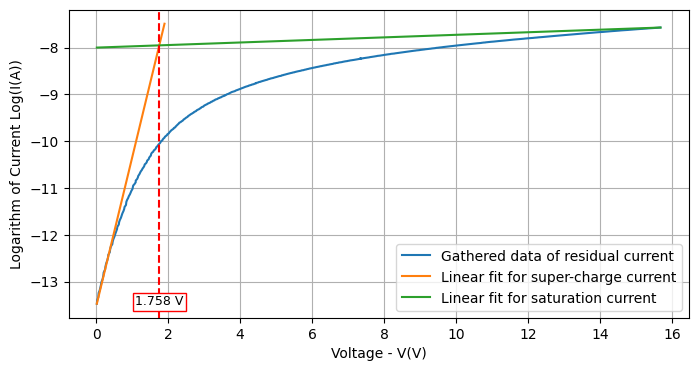

In [6]:
#6V
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

data = np.loadtxt('2024-05-07-task111-6v.txt')  

x = data[:, 0]  
y = data[:, 1]  

y_R = np.divide(y, 27)
y_Rlog = np.log(y_R)

x1 = 0.0200000     
y1 = np.log(np.divide(3.81000e-005, 27))
x2 = 0.25     
y2 = np.log(np.divide(7.92000e-005, 27))

m1 = np.divide((y2 - y1),(x2 - x1))
b1 = y1 - m1 * x1
x1_val = np.linspace(0.02,1.9,1000)
y1_val = (m1 * x1_val) + b1

x3 = 15.6400  
y3 = np.log(np.divide(0.0138894,27))
x4 = 15.6800   
y4 = np.log(np.divide(0.0139046,27))

m2 = np.divide((y4 - y3),(x4 - x3))
b2 = y3 - m2 * x3
x2_val = np.linspace(0.02,15.68,1000)
y2_val = (m2 * x2_val) + b2

x_inter = 1.758

plt.plot(x, y_Rlog, label= 'Gathered data of residual current')
plt.plot(x1_val, y1_val, label='Linear fit for super-charge current')
plt.plot(x2_val, y2_val, label='Linear fit for saturation current')
plt.axvline(x_inter, color='r', linestyle='--')
plt.text(x_inter, -13.5 , "1.758 V", color='black', fontsize=9, ha='center', bbox=dict(facecolor='white', edgecolor='red', boxstyle='square,pad=0.2'))
plt.xlabel('Voltage - V(V)')
plt.ylabel('Logarithm of Current Log(I(A))')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

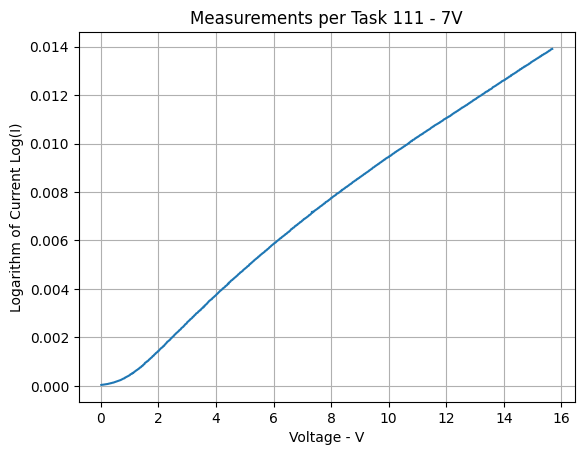

In [62]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('2024-05-07-task111-6v.txt')  

x = data[:, 0]  
y = data[:, 1]  

plt.plot(x, y)
plt.xlabel('Voltage - V')
plt.ylabel('Logarithm of Current Log(I)')
plt.title('Measurements per Task 111 - 7V')
plt.grid(True)
plt.show()

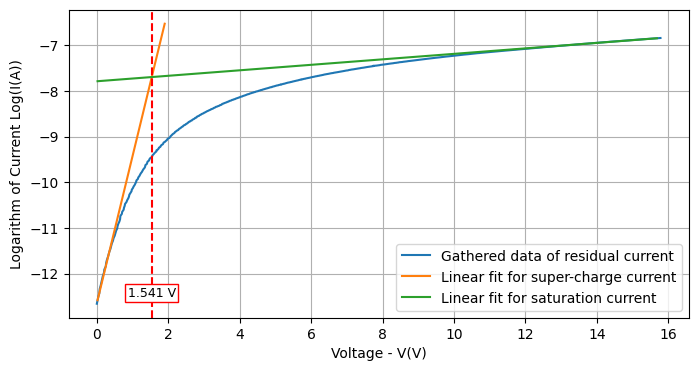

In [7]:
#7V
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

data = np.loadtxt('2024-05-07-task111-7v.txt')  

x = data[:, 0]  
y = data[:, 1]  

y_R = np.divide(y, 27)
y_Rlog = np.log(y_R)

x1 = 0.0200000     
y1 = np.log(np.divide(9.27000e-005, 27))
x2 = 0.25     
y2 = np.log(np.divide(0.000194400, 27))

m1 = np.divide((y2 - y1),(x2 - x1))
b1 = y1 - m1 * x1
x1_val = np.linspace(0.02,1.9,1000)
y1_val = (m1 * x1_val) + b1

x3 = 15.7600 
y3 = np.log(np.divide(0.0288127,27))
x4 = 15.7800   
y4 = np.log(np.divide(0.0288473,27))

m2 = np.divide((y4 - y3),(x4 - x3))
b2 = y3 - m2 * x3
x2_val = np.linspace(0.02,15.68,1000)
y2_val = (m2 * x2_val) + b2

x_inter = 1.541

plt.plot(x, y_Rlog, label= 'Gathered data of residual current')
plt.plot(x1_val, y1_val, label='Linear fit for super-charge current')
plt.plot(x2_val, y2_val, label='Linear fit for saturation current')
plt.axvline(x_inter, color='r', linestyle='--')
plt.text(x_inter, -12.5 , "1.541 V", color='black', fontsize=9, ha='center', bbox=dict(facecolor='white', edgecolor='red', boxstyle='square,pad=0.2'))
plt.xlabel('Voltage - V(V)')
plt.ylabel('Logarithm of Current Log(I(A))')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

C:\Users\dmitr\AppData\Local\Temp\ipykernel_4432\1395845889.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  m_left = (interpolated_func(x_extrapolate[0]) - y_left) / (x_extrapolate[0] - x_left)
C:\Users\dmitr\AppData\Local\Temp\ipykernel_4432\1395845889.py:30: RuntimeWarning: invalid value encountered in add
  y_left_extrapolated = m_left * x_extrapolate + b_left


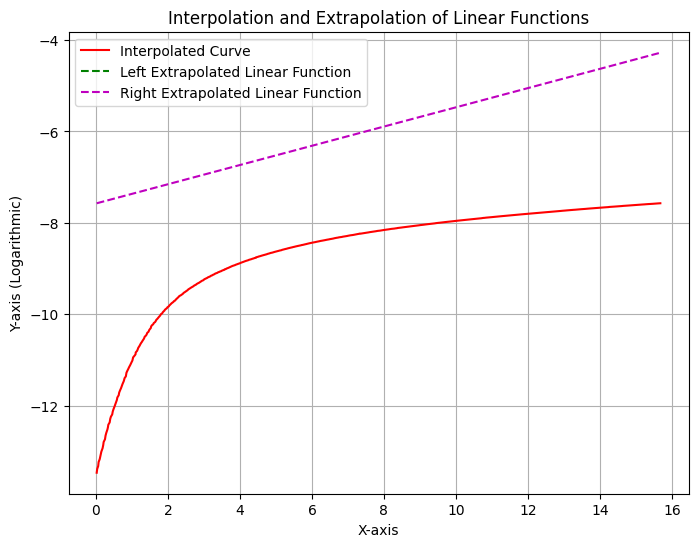

In [39]:
##Test

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load data from text file
data = np.loadtxt('2024-05-07-task111-6v.txt')  # Assuming 'data.txt' contains two columns: x and y

# Separate x and y data
x = data[:, 0]
y = data[:, 1]

# Logarithmic conversion of y data
y_R = np.divide(y, 27)
y_log = np.log(y_R)

# Interpolate the data
interpolated_func = interp1d(x, y_log, kind='linear')

# Generate x-values for extrapolation
x_extrapolate = np.linspace(min(x), max(x), 1000)

# Extrapolate linear functions
# Left side linear function
x_left = 0.0200000 
y_left = np.log(3.81000e-5)
m_left = (interpolated_func(x_extrapolate[0]) - y_left) / (x_extrapolate[0] - x_left)
b_left = y_left - m_left * x_left
y_left_extrapolated = m_left * x_extrapolate + b_left

# Right side linear function
x_right = 15.6800
y_right = np.log(0.0139046)
m_right = (interpolated_func(x_extrapolate[-1]) - y_right) / (x_extrapolate[1] - x_right)
b_right = y_right - m_right * x_right
y_right_extrapolated = m_right * x_extrapolate + b_right

# Plot the data, interpolated curve, and extrapolated linear functions
plt.figure(figsize=(8, 6))
plt.plot(x_extrapolate, interpolated_func(x_extrapolate), 'r-', label='Interpolated Curve')
plt.plot(x_extrapolate, y_left_extrapolated, 'g--', label='Left Extrapolated Linear Function')
plt.plot(x_extrapolate, y_right_extrapolated, 'm--', label='Right Extrapolated Linear Function')

# Customize the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis (Logarithmic)')
plt.title('Interpolation and Extrapolation of Linear Functions')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()